# Calculations on nested structures

In [1]:
import numpy
MHT_pt = numpy.empty(55432, dtype=numpy.float32)
MHT_phi = numpy.empty(55432, dtype=numpy.float32)

def calculateMHT(events, MHT_pt, MHT_phi):
    i = 0
    for event in events:
        mht_px = 0.0
        mht_py = 0.0
        mht_pz = 0.0
        for electron in event.Electron:
            mht_px += electron.pt * cosh(electron.eta) * sin(electron.phi)
            mht_py += electron.pt * cosh(electron.eta) * cos(electron.phi)
            mht_pz += electron.pt * sinh(electron.eta)
        for muon in event.Muon:
            mht_px += muon.pt * cosh(muon.eta) * sin(muon.phi)
            mht_py += muon.pt * cosh(muon.eta) * cos(muon.phi)
            mht_pz += muon.pt * sinh(muon.eta)
        for jet in event.Jet:
            if jet.pt > 150:
                mht_px += jet.pt * cosh(jet.eta) * sin(jet.phi)
                mht_py += jet.pt * cosh(jet.eta) * cos(jet.phi)
                mht_pz += jet.pt * sinh(jet.eta)

        MHT_pt[i] = sqrt(mht_px**2 + mht_py**2)
        MHT_phi[i] = -atan2(MHT_pt[i], mht_pz)
        i += 1

In [20]:
import time
import math
import uproot
tree = uproot.open("~/storage/data/nano-TTLHE-2017-09-04-uncompressed.root")["Events"]

startTime = time.time()
tree.arrowed.run(calculateMHT, (MHT_pt, MHT_phi), env=math.__dict__)
endTime = time.time()

print("Time for one run: {} seconds --> {:.2f} kHz".format(endTime - startTime, len(tree)/(endTime - startTime)*1e-3))

Time for one run: 1.84681391716 seconds --> 30.01 kHz


In [3]:
import pandas
pandas.DataFrame({"MHT_pt": MHT_pt, "MHT_phi": MHT_phi})

,MHT_phi,MHT_pt
0,-1.016380,124.105011
1,-1.786605,5.250953
2,-1.255930,14.964581
3,-0.636966,213.986099
4,-2.210669,41.393135
5,-0.397885,161.648438
6,-0.786898,1370.723755
7,-2.393102,2427.410400
8,-1.258100,371.518036
9,-1.906085,412.545441


In [4]:
import time
from PhysicsTools.NanoAODTools.postprocessing.framework.postprocessor import PostProcessor
from PhysicsTools.NanoAODTools.postprocessing.examples.mhtProducer import *

p = PostProcessor(".", ["/home/pivarski/storage/data/nano-TTLHE-2017-09-04-uncompressed.root"], "Jet_pt > 150", "keep_and_drop.txt", [mht()], compression="ZLIB:0", friend=True)

startTime = time.time()
p.run()
endTime = time.time()

print("Time for one run: {0} seconds".format(endTime - startTime))

Welcome to JupyROOT 6.08/04
Will write selected trees to .
Processed    10000/   55432 entries (elapsed time     9.9s, curr speed    1.006 kHz, avg speed    1.006 kHz), accepted    10001/   10001 events (100.00%)
Processed    20000/   55432 entries (elapsed time    19.5s, curr speed    1.044 kHz, avg speed    1.025 kHz), accepted    20001/   20001 events (100.00%)
Processed    30000/   55432 entries (elapsed time    29.0s, curr speed    1.052 kHz, avg speed    1.034 kHz), accepted    30001/   30001 events (100.00%)
Processed    40000/   55432 entries (elapsed time    38.5s, curr speed    1.053 kHz, avg speed    1.038 kHz), accepted    40001/   40001 events (100.00%)
Processed    50000/   55432 entries (elapsed time    48.4s, curr speed    1.011 kHz, avg speed    1.033 kHz), accepted    50001/   50001 events (100.00%)
Processed 55432 entries from /home/pivarski/storage/data/nano-TTLHE-2017-09-04-uncompressed.root, selected 55432 entries
Done ./nano-TTLHE-2017-09-04-uncompressed_Friend.r

Just as `tree` has a `.pandas` connector, it has a `.arrowed` connector to present itself as an Arrow dataset, which is used to compile the function.

This includes a ROOT branch ⟷ nested schema mapping.

In [5]:
print(tree.arrowed.schema().format())

List [
  countarray = None
  Record {
    name = u'Events'
    run: 'run'
    luminosityBlock: 'luminosityBlock'
    event: 'event'
    nElectron: 'nElectron'
    Electron: List [
      countarray = 'nElectron'
      Record {
        name = u'Electron'
        deltaEtaSC: 'Electron_deltaEtaSC'
        dxy: 'Electron_dxy'
        eta: 'Electron_eta'
        mass: 'Electron_mass'
        mvaSpring16GP: 'Electron_mvaSpring16GP'
        mvaSpring16HZZ: 'Electron_mvaSpring16HZZ'
        phi: 'Electron_phi'
        pt: 'Electron_pt'
        pterr: 'Electron_pterr'
        r9: 'Electron_r9'
        sieie: 'Electron_sieie'
        sip3d: 'Electron_sip3d'
        charge: 'Electron_charge'
        cutBased: 'Electron_cutBased'
        cutBased_HLTPreSel: 'Electron_cutBased_HLTPreSel'
        jet: 'Electron_jet'
        mvaSpring16GP_WP80: 'Electron_mvaSpring16GP_WP80'
        mvaSpring16GP_WP90: 'Electron_mvaSpring16GP_WP90'
        mvaSpring16HZZ_WPL: 'Electron_mvaSpring16HZZ_WPL'
        pdgId

Using this mapping, we walk through the structure of the code and replace object references with array lookups.

In [6]:
tree.arrowed.run(calculateMHT, (MHT_pt, MHT_phi), env=math.__dict__, debug=True)


Before transformation:
----------------------
def calculateMHT(events, MHT_pt, MHT_phi):
    i = 0
    for event in events:    
        mht_px = 0.0
        mht_py = 0.0
        mht_pz = 0.0
        for electron in event.Electron:        
            mht_px += ((electron.pt * cosh(electron.eta)) * sin(electron.phi))
            mht_py += ((electron.pt * cosh(electron.eta)) * cos(electron.phi))
            mht_pz += (electron.pt * sinh(electron.eta))
        for muon in event.Muon:        
            mht_px += ((muon.pt * cosh(muon.eta)) * sin(muon.phi))
            mht_py += ((muon.pt * cosh(muon.eta)) * cos(muon.phi))
            mht_pz += (muon.pt * sinh(muon.eta))
        for jet in event.Jet:        
            if (jet.pt > 150):            
                mht_px += ((jet.pt * cosh(jet.eta)) * sin(jet.phi))
                mht_py += ((jet.pt * cosh(jet.eta)) * cos(jet.phi))
                mht_pz += (jet.pt * sinh(jet.eta))
            
        MHT_pt[i] = sqrt(((mht_px ** 2) +

This is a formal process, like a compilation pass. To be rigorous, we need to do type inference through the code tree.

Finally, the transformed code, which consists of nothing but numbers and arrays of numbers, is passed to Numba, a numerical Python compiler.

<table>
<tr style="background: white"><td><center><img src="http://numba.pydata.org/_static/numba_blue_icon_rgb.png" width="200"></center></td></tr>
<tr><td style="font-size: 18pt">Numba <a href="http://numba.pydata.org/">numba.pydata.org</a></td></tr>
</table>

Even without the full compilation, the transformation by itself speeds up access considerably.

In [21]:
startTime = time.time()
tree.arrowed.run(calculateMHT, (MHT_pt, MHT_phi), env=math.__dict__, numba=None)
endTime = time.time()

print("Time for one run: {0} seconds".format(endTime - startTime))

Time for one run: 11.898900032 seconds


Compilation results in fast code, but it's hard to debug. The thing we like about Python is the ease of *exploring* data. For interacting with individual objects, use proxies:

In [8]:
events = tree.arrowed.proxy()

In [9]:
events

[<Record at index 0>, <Record at index 1>, <Record at index 2>, <Record at index 3>, ...]

A proxy pretends to be a Python object, fetching the data you ask for on demand. Every time you look at a particle attribute, it reads one TBasket from the ROOT file or reuses a previously read one.

Compilation is for high throughput; proxies are for low latency.

Compiled functions can return proxies.

In [10]:
def event_with_bigjet(events):
    for event in events:
        for jet in event.Jet:
            if jet.pt > 1000:
                return event

event = tree.arrowed.run(event_with_bigjet)

In [11]:
[jet.pt for jet in event.Jet]

[1030.0,
 628.0,
 277.5,
 140.25,
 92.125,
 34.84375,
 32.21875,
 23.6875,
 21.9375,
 21.84375,
 20.78125]

You *can* use existing code in these compiled functions. If the code references other Python functions, it will (someday) extend the compilation process to include those other functions. It can also call functions defined in C.

Here's the catch: C, not C++.

C functions can be loaded from `.so` files without name mangling and executed as pointers, needing only the argument signature. C++ files require more vital information from the header files.

**Solution:** use ROOT's Cling to make C functions on demand.

In [12]:
import ROOT
import ctypes

# we want a ROOT histogram
h = ROOT.TH1I("h", "", 150, 0, 150)

# make a function (to get a function pointer) that fills h
ROOT.gInterpreter.Declare("void h_Fill(double x) { h->Fill(x); }")

# turn it into an integer and pass it from C++ to Python
ROOT.gInterpreter.Declare("size_t ptr_h_Fill = reinterpret_cast<size_t>(h_Fill);")

# use Python's ctypes to interpret that integer as a callable function
h_Fill = ctypes.CFUNCTYPE(None, ctypes.c_double)(ROOT.ptr_h_Fill)

In [13]:
def process(events):
    for event in events:
        for jet in event.Jet:
            h_Fill(jet.pt)

tree.arrowed.run(process, env={"h_Fill": h_Fill})

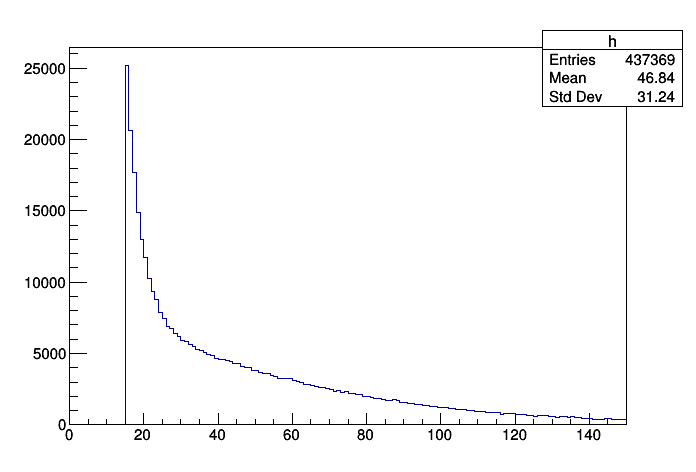

In [14]:
c = ROOT.TCanvas()
h.Draw()
c.Draw()

In [15]:
ROOT.TLorentzVector   # cause ROOT to dyload the library
ROOT.gInterpreter.Declare("""
double mass(double pt1, double eta1, double phi1, double pt2, double eta2, double phi2) {
    TLorentzVector v1, v2;
    v1.SetPtEtaPhiM(pt1, eta1, phi1, 0);
    v2.SetPtEtaPhiM(pt2, eta2, phi2, 0);
    return (v1 + v2).M();
}
size_t ptr_mass = reinterpret_cast<size_t>(mass);
""")

mass = ctypes.CFUNCTYPE(ctypes.c_double,                                    # return type
                        ctypes.c_double, ctypes.c_double, ctypes.c_double,  # parameter types
                        ctypes.c_double, ctypes.c_double, ctypes.c_double
                       )(ROOT.ptr_mass)

In [16]:
def calc_masses(events):
    i = 0
    for event in events:
        e1 = None
        e2 = None
        for electron in event.Electron:
            if e1 is None or electron.pt > e1.pt:
                e2 = e1
                e1 = electron
                continue
            if e2 is None or electron.pt > e2.pt:
                e2 = electron
        if e1 is not None and e2 is not None:
            h_Fill(mass(e1.pt, e1.eta, e1.phi, e2.pt, e2.eta, e2.phi))
        i += 1

In [17]:
tree = uproot.open("~/storage/data/SingleElectronRun2015D_16Dec2015_v1_0000_1.root")["Events"]

function = tree.arrowed.compile(calc_masses, env={"mass": mass, "h_Fill": h_Fill})

h.Reset()
startTime = time.time()

for entrystart, entryend, dummy in function.run(10000, "~/storage/data/SingleElectronRun2015D_16Dec2015_v1_0000_*.root", "Events", reportentries=True):
    elapsed = time.time() - startTime
    print("{} events / {:.2f} seconds = {:.1f} kHz".format(entryend, elapsed, entryend / elapsed * 1e-3))

10000 events / 1.80 seconds = 5.5 kHz
20000 events / 1.84 seconds = 10.9 kHz
30000 events / 2.79 seconds = 10.8 kHz
40000 events / 2.82 seconds = 14.2 kHz
50000 events / 3.76 seconds = 13.3 kHz
60000 events / 3.80 seconds = 15.8 kHz
70000 events / 4.78 seconds = 14.6 kHz
80000 events / 6.05 seconds = 13.2 kHz
90000 events / 6.09 seconds = 14.8 kHz
100000 events / 7.07 seconds = 14.1 kHz
110000 events / 8.02 seconds = 13.7 kHz
120000 events / 8.08 seconds = 14.9 kHz
130000 events / 8.11 seconds = 16.0 kHz
140000 events / 8.97 seconds = 15.6 kHz
150000 events / 9.85 seconds = 15.2 kHz
160000 events / 9.89 seconds = 16.2 kHz
170000 events / 11.02 seconds = 15.4 kHz
180000 events / 11.06 seconds = 16.3 kHz
190000 events / 11.10 seconds = 17.1 kHz
200000 events / 11.98 seconds = 16.7 kHz
210000 events / 12.01 seconds = 17.5 kHz
220000 events / 13.70 seconds = 16.1 kHz
230000 events / 13.73 seconds = 16.8 kHz
234805 events / 13.76 seconds = 17.1 kHz


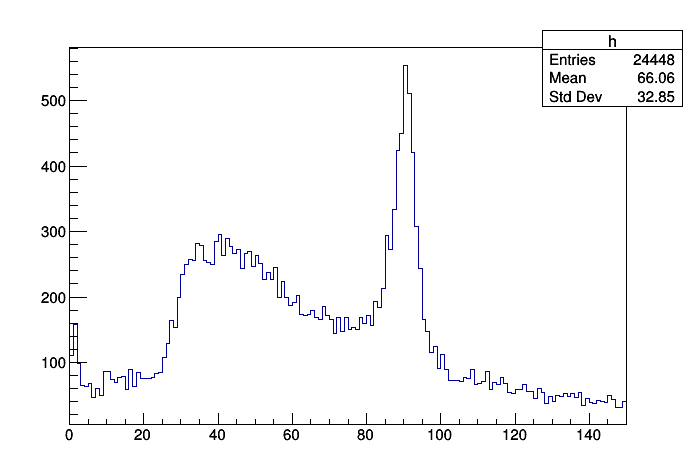

In [18]:
h.Draw()
c.Draw()

The interface I've shown is not how this package will ultimately look.

   * This `run` function is powerful, but side-effect changing; it encourages non-parallelizable code. I'll leave `run` as a low-level interface, but build the standard `map`, `filter`, `reduce`, etc. on top of it.
   * I should probably generalize and wrap up this method of exposing ROOT functions to Arrowed.
   * Histogrammar, a small suite of physics functions, ...

Interested in trying it out? Giving me feedback?